In [5]:
import matplotlib.pyplot as plt

def plot_train_valid_learn_rate(train_metrics, learn_rate=False):

    train_losses = [metrics['train']['loss'] for metrics in train_metrics]
    valid_losses = [metrics['valid']['loss'] for metrics in train_metrics]

    train_epochs = range(1, len(train_losses) + 1)
    valid_epochs = range(1, len(valid_losses) + 1)

    learning_rates = [metrics['learning_rate'] for metrics in train_metrics]

    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.plot(train_epochs, train_losses, label='Train Loss')
    ax1.plot(valid_epochs, valid_losses, label='Valid Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')

    ax1.set_xticks(range(1, max(train_epochs)+1))

    if learn_rate:
        ax2 = ax1.twinx()
        ax2.plot(train_epochs, learning_rates, label='Learning Rate', linestyle='--', color='red')
        ax2.set_ylabel('Learning Rate')

    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    plt.title('Loss and Learning Rate over epochs')
    plt.show()

In [20]:
import json

def get_train_metrics(train_id, old=False):
    if not old:
        with open(f"out/{train_id}/train_metrics.json") as f:
            train_metrics = json.load(f)
    else:
        with open(f"out/{train_id}/train.json") as f:
            train_metrics = json.load(f)['metrics']
    return train_metrics[1:] # ignore epoch 0 for now

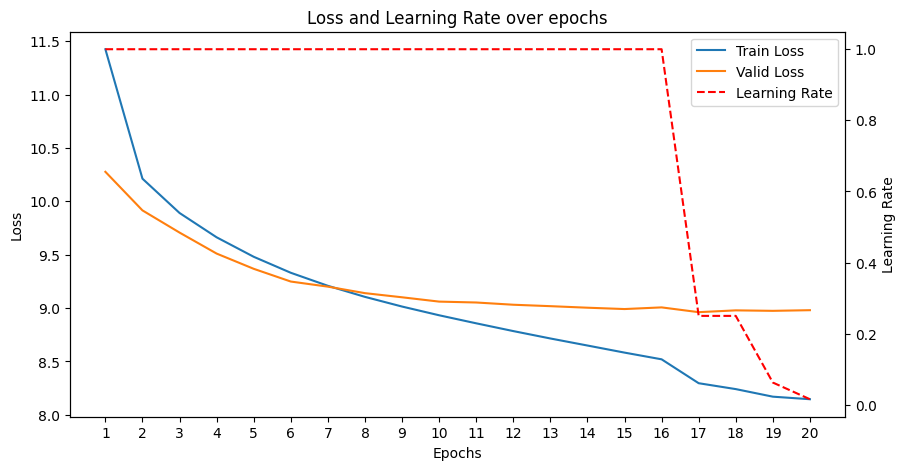

In [23]:
# 19 maig mentre esmorzava, he vist que hi havia un plateau del valid_loss i massa overfitting amb aquesta strat
plot_train_valid_learn_rate(get_train_metrics('train_id_4', old=True), learn_rate=True)

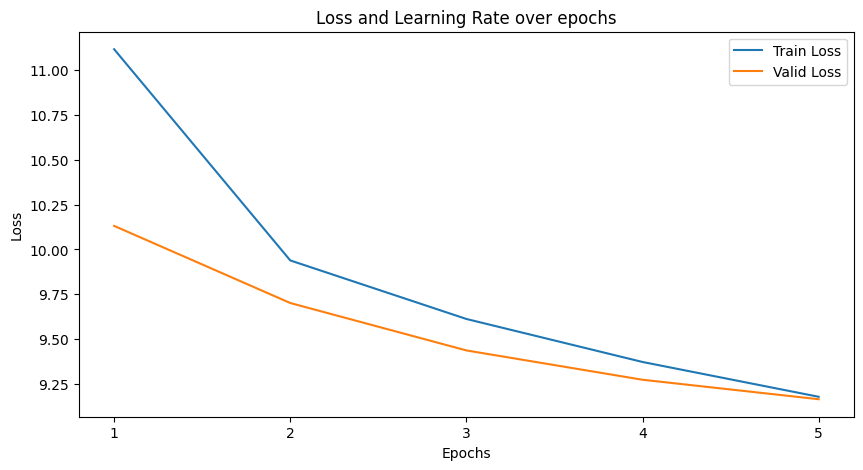

In [ ]:
# 19 maig ja bo però només 5 èpoques
plot_train_valid_learn_rate(get_train_metrics('train_id_13'), learn_rate=False)